- - - -
# LED Electrical Characteristics Dependence on LED Color

We will explore the current and voltage characteristics of light emitting diodes (LEDs). Using plots of current vs. voltage and assuming Planck's hypothesis that photons have energy $hc/\lambda$, we will determine the wavelength of light emitted from an LED. We will using a DC power supply connected to a resistor and LED series circuit to collect voltage data on the LED-resistor voltage divider circuit as seen in Figure 1. Our experiments will observe how forward-biased voltage and current depends on the color of the LED.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/LED_circuit.svg/1200px-LED_circuit.svg.png" alt="LED-resistor voltage divider circuit" width="200">
Figure 1. A voltage divider circuit with DC input and an LED and known resistor as loads on the circuit.
</center>

The LED is directional with a cathode and anode as shown in Figure 2.

<center>
<img src="https://content-calpoly-edu.s3.amazonaws.com/idesign/1/images/LED.png" alt="LED diagram" width="300">
Figure 2. A diagram of an LED.
</center>

In [4]:
# import modules
import numpy as np
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud, sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Procedure
Import the modules above. Then, set up the circuit as shown above using the DC power supply in place of the $V$, a.k.a $V_{in}$. You will measure the voltage output of the DC power supply and the voltage across the LED. Record the known resistance and its uncertainty in the cell below. We can approximate the voltage needed to illuminate an LED using Planck's hypothesis. In the code cell below, calculate the photon energy in electron volts for blue (400 nm), greed (500 nm), yellow (600 nm), and red (650 nm) photons. Electron-volts are a funny unit. We can divide by $e$ to get Volts. On the other side of the Planck energy equation, dividing by $e$ simply changes the units from Joules to electron-Volts. Therefore, we can use units as described below to calculate the LED energies in eV.

$$E_{photons}\left(eV\right) = \frac{hc}{\lambda}$$

In order to get light emitted from the diode, we need to apply energy to the circuit comparable to this energy. Our plan is to increase the applied energy (Voltage) to the circuit and determine the LED wavelength from the onset of light emission, which corresponds to the onset of Ohmic behavior.

* Define `hc = 1240 #eV-nm`
* Define `R = #ohms known resistor`
* Define `dR = #uncertainty of known resistor from last band`
* Calculate photon energy for each LED.

In [22]:
hc = 1240 #ev-nm
R = 10 #Known resistance
dR = 0.05*R#uncertainty in the known resistance

#Use wavelengths above in nm to get eV energies.
eV_blue = hc/400 #nm
eV_green = hc/500
eV_yellow = hc/600
eV_red = hc/650

print('blue = %.1f' % eV_blue,'eV', 'green = %.1f' %  eV_green,'eV', 'yellow = %.1f' %  eV_yellow,'eV', 'red = %.1f' %  eV_red,'eV')

blue = 3.1 eV green = 2.5 eV yellow = 2.1 eV red = 1.9 eV


These will be the **maximum voltages** you apply to your circuit with the DC power supply for each LED. Divide these voltages by 20-30 to determine the voltage increment to use for each LED. For example, you will measure from 0.1 to 3.1 Volts in steps of 0.10 Volt for the blue LED.

Enter your data below for the DC power supply, e.g., `blue_V` and for the voltage across the LED, e.g., `blue_VL`.

In [37]:
#Enter blue LED data
blue_Vin = np.arange(0.1,3.1,0.1) #Power supply voltage
blue_VL = blue_Vin-np.array([0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0012, 0.0069,0.018,0.0339, 0.0538, 0.0772, 0.1052]) #Resistor voltage
#Enter green LED data
green_Vin = np.array([]) #Power supply voltage
green_VL = np.array([]) #Resistor voltage
#Enter yellow LED data
yellow_Vin = np.array([]) #Power supply voltage
yellow_VL = np.array([]) #Resistor voltage
#Enter red LED data
red_Vin = np.array([]) #Power supply voltage
red_VL = np.array([]) #Resistor voltage

Since resistive circuits obey the linear Ohm's Law ($V=IR$), let's calculate current $I$ for our circuit.  We know from Ohm's Law that

$$\begin{align}
\\
V_{in} &= V_{LED}+ V_R\\
\\
V_{in} &= V_{LED}+IR
\end{align}$$

The second equation is written in a form to maximize the number of measured quantities shown in the equation. These measured quantities are $V_{in}, V_{LED},$ and $R$. Therefore, the last equation has one unknown $I$.

### Deliverable #1
Starting from Ohm’s Law, show that the voltage divider circuit of Figure 1 allows you to calculate the current in terms of known or measured quantities ($R$, $V_{in}$, and $V_{LED}$). 

<font color="red">Typeset your derivation of current here.</font>


For each LED color, create a current array below using the equation you derived above.

In [38]:
blue_I = (blue_Vin-blue_VL)/R
#green_I = 
#yellow_I = 
#red_I = 

Now, plot all four LEDs on a single graph. The graph will be $I$ vs. $V_{LED}$. Color and label each plot the same color as the LED color.

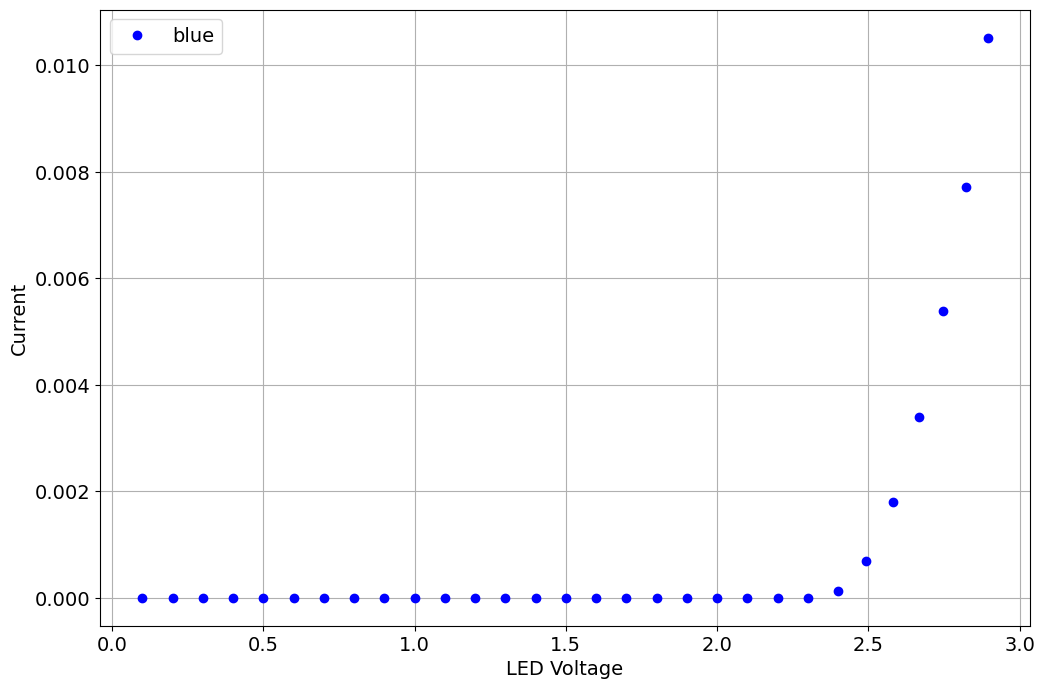

In [39]:
plt.plot(blue_VL, blue_I, 'bo', label='blue')#plot blue
#plot green
#plot yellow
#plot red
plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.legend(loc=0)
plt.grid(True)
plt.show()

Notice that only a portion of the graphs appear to have $I$ proportional to $V_{LED}$. Since we are assuming Ohm's Law to be valid, we need to select only the data that appears to have a linear dependence between $I$ and $V_{LED}$. Our eventual goal is to find the turn-on voltage as shown in Figure 3. To do this we will fit a line to the linearly increasing current vs. voltage.

<center>
<img src="https://raw.githubusercontent.com/troymessina/ModernPhysics/master/images/Turn-onV.gif" alt="Graph showing turn-on voltage of an LED" width="400">
    Figure 3. Graph showing the linear region of LED I-V curve and the extrapolation to the turn-on voltage.
</center>

With that line we can find the x-intercept, and use that as the turn-on voltage. To do this fitting we want to create arrays with only the part of the data we want to fit. You need to find the region of your data that is linear and either remeasure only that region of $V_{in}$ or copy that portion of your arrays above into the arrays below. It may take some testing to find the best range of data. You should have at least five data points in this linear region. If you do not, fill in your data by taking more measurements. In the code cell below redefine the data arrays to only have the linear portions of data. Re-plot the arrays to ensure the data appears linear for each LED.



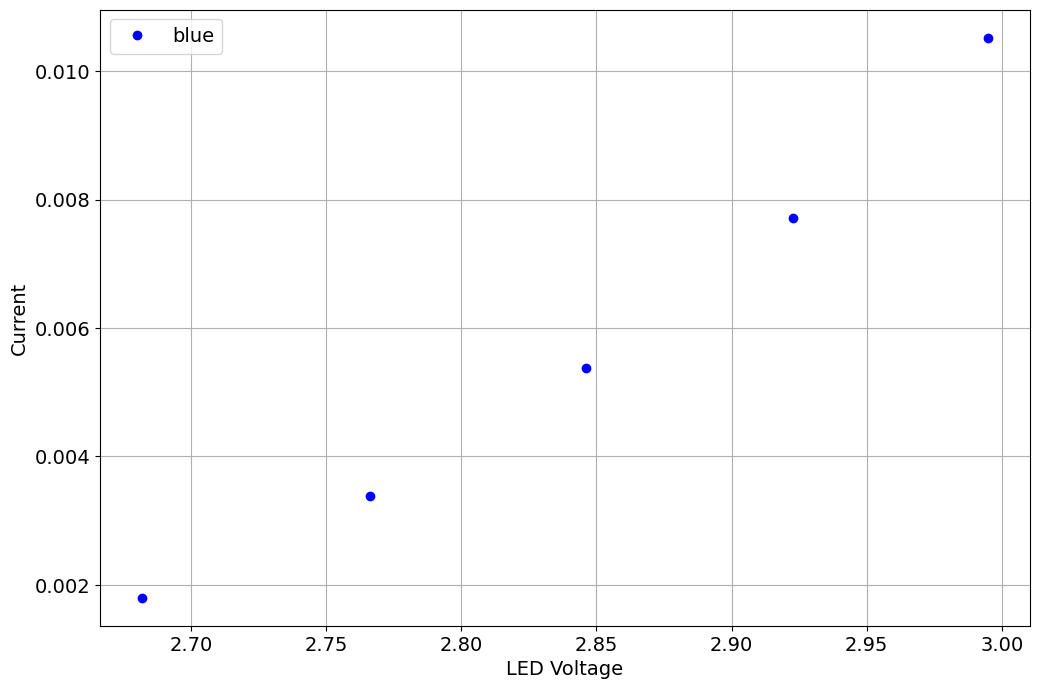

In [41]:
#Enter blue LED data
blue_Vin = np.array([ 2.7, 2.8, 2.9, 3.0, 3.1]) #Power supply voltage
blue_VL = blue_Vin-np.array([0.018,0.0339, 0.0538, 0.0772, 0.1052]) #Resistor voltage
blue_I = (blue_Vin-blue_VL)/R #blue current
plt.plot(blue_VL, blue_I, 'bo', label='blue')#plot blue

plt.xlabel('LED Voltage')
plt.ylabel('Current')
plt.legend(loc=0)
plt.grid(True)
plt.show()

We need to propagate the uncertainty to the current before we attempt to fit the data for the turn-on voltage. The uncertainty in the current is propagated as

$$\Delta I = \left|\frac{\partial I}{\partial V_{in}}\right|\Delta V_{in}+\left|\frac{\partial I}{\partial V_{LED}}\right|\Delta V_{LED}+\left|\frac{\partial I}{\partial R}\right|\Delta R$$

We are partially differentiating the current you derived in **Deliverable 1** to find uncertainty coming from each measured variable. The $\Delta V{in}$ and $\Delta V_{LED}$ are voltage uncertainties. We will assume the uncertainty in the voltages comes from the digitization on the DC power supply display. The uncertainty in the resistor $\Delta R$ is based on the fourth color band. Silver is 10% and gold is 5% of the resistor value, e.g., a gold band has relative uncertainty $\Delta R/R = 0.05$.

### Deliverable #2
Typeset the equation for the uncertainty in current where all of the derivatives have been taken.

<font color="red">Typeset your uncertainty in current here.</font>

In the code cell below calculate the uncertainty in the current for each LED.

In [58]:
blue_dI = 0.005/R+0.005/R+(blue_Vin-blue_VL)/R**2*dR
#green_dI = 
#yellow_dI =
#red_dI = 

## Fitting Data
The following code cell creates a linear fitting function. You will need to insert intial guesses for the slope and intercept. These values can be approximate, and the same values can be used for all of the colors of LED.

In [59]:
# curve_fit function
def f_line(x, m, b):
    return m*x + b

m_guess = 1#guess the slope based on your data
b_guess = 1#guess the intercept based on your data

### Blue LED
Fit the blue LED and plot the fit. Once this works, proceed with the other three LEDS and plot them all together at the end.

[ 0.0269538  -0.07086956] [[ 2.69068493e-05 -7.57856295e-05]
 [-7.57856295e-05  2.13775322e-04]]


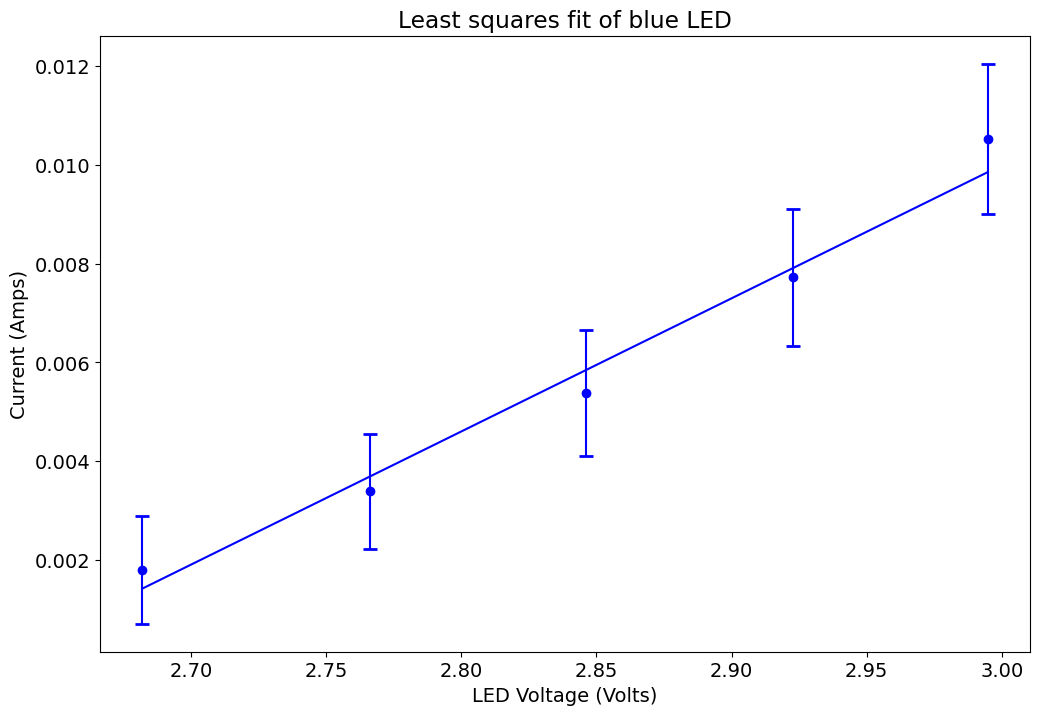

In [60]:
#You'll repeat this for each color. 
#It will likely take more than one try for each to find the right region to fit.
#It is recommended to do this one color at a time. Copy and paste the code below in new cells for each color.
blue_params, blue_pcov = curve_fit(f_line, blue_VL, blue_I, (m_guess,b_guess), sigma=blue_dI, absolute_sigma=True)

#print('values of the fitting parameters')
print(blue_params, blue_pcov)

#plt.plot(blue_df['Vled'], blue_df['current'], 'bo')
plt.errorbar(blue_VL, blue_I, fmt='bo', yerr=blue_dI, capsize=5, capthick=2)
plt.plot(blue_VL, f_line(blue_VL, *blue_params), 'b')
plt.title('Least squares fit of blue LED')
#plt.xlim([0,3.0])
#plt.ylim([-1e-5,0.00008])
plt.xlabel('LED Voltage (Volts)')
plt.ylabel('Current (Amps)')
plt.show()

### Green LED

### Yellow LED

### Red LED

Once we have a good linear fit, we need to calculate the x-intercept from the fit parameters. We know that

$$y = mx + b$$

and we want the $x$ value where $y=0$. In terms of our fit parameters, the blue $m$ is `blue_params[0]` and $b$ is `blue_params[1]`.


### Deliverable #3
Show how you calculate the x-intercept from the fit parameters.

<font color="red">Typeset your x-intercept calculation here.</font>

Use python to calculate this intercept.

In [61]:
blue_turn_onV = np.abs(blue_params[1]/blue_params[0])
print(blue_turn_onV)

2.629297946090396


We can use the turn-on voltage directly to calculate the wavelength since it is the voltage at which light begins to be emitted.

$$\frac{hc}{\lambda} = V_{turn-on}$$

Use this to calculate the wavelength of each LED.

In [62]:
blue_wL = hc/blue_turn_onV#blue wavelength
#green_wL = #green wavelength
#yellow_wL = #yellow wavelength
#red_wL = #red wavelength

We can use the covariant matrix to propagate uncertainty to our wavelengths. The diagonal of the covariant matrix is the squares of the uncertainties in slope (e.g., $\Delta m = \sqrt{\rm blue\_pcov[0,0]}$) and intercept (e.g., $\Delta b = \sqrt{\rm blue\_pcov[1,1]}$). First, we square root those values to get uncertainties in slope and intercept. Then, we calculated the x-intercept as the ratio of these. Therefore, the uncertainty in the turn-on voltage is found by

$$V_{turn-on} = \frac{b}{m}$$

$$\Delta V_{turn-on} = \frac{\partial V_{turn-on}}{\partial b}\cdot\Delta b + \frac{\partial V_{turn-on}}{\partial m}\cdot\Delta m$$

$$\Delta V_{turn-on} = \frac{1}{m}\cdot\Delta b + \frac{b}{m^2}\cdot\Delta m$$

and since

$$\lambda = \frac{hc}{eV_{turn-on}}$$

the uncertainty in the wavelength is

$$\Delta \lambda = \frac{hc}{V_{turn-on}^2}\Delta V_{turn-on}$$

In [63]:
blue_wL_unc = (1/blue_params[0]*sqrt(blue_pcov[1,1])+blue_params[1]/blue_params[0]**2*sqrt(blue_pcov[0,0]))*hc/blue_turn_onV**2#blue wavelength
#green_wL_unc = #green wavelength
#yellow_wL_unc = #yellow wavelength
#red_wL_unc = #red wavelength

#print the wavelengths
#print("red: %3.1f, +/- %3.1f, nm" % (red_wL*1e9, red_wL_unc*1e9))
#print("yellow: %3.1f, +/- %3.1f, nm" % (yellow_wL*1e9, yellow_wL_unc*1e9))
#print("green: %3.1f, +/- %3.1f, nm" % (green_wL*1e9, green_wL_unc*1e9))
print("blue: %3.1f, +/- %3.1f, nm" % (blue_wL, blue_wL_unc))

blue: 471.6, +/- 6.5, nm
